In [1]:
import os
import sys

# add parent folder to path if needed
parent_dir = os.getcwd().replace('\\notebooks', '')
if parent_dir not in sys.path:
    sys.path = [parent_dir] + sys.path

import random
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from src import regressions as reg
from src.models import MLP, SBR, SBRBatchGenerator
from src.regressions import UnivariateSBR

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
sns.set_style('whitegrid')
sns.set_context('notebook')
reg.import_extension_methods()

# Cars Dataset

99 train samples, 25 validation samples, 31 test samples


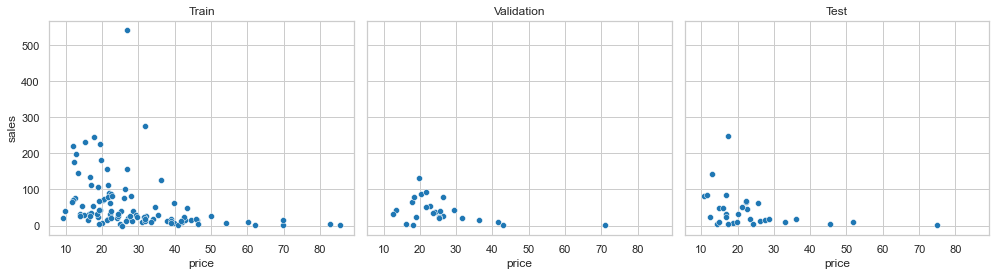

In [2]:
data = reg.load_cars('../res/cars.csv')
x_train, y_train = data['train']

reg.plot_cars(**data)

## MLP

-0.3645 (train r2), -0.7444 (validation r2), -0.3194 (test r2)


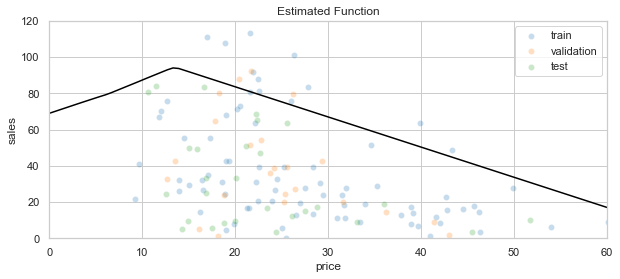

In [3]:
mlp = MLP(output_act=None, h_units=[32, 32])
mlp.compile(optimizer='rmsprop', loss='mse')

early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
mlp.fit(x_train, y_train, epochs=1000, callbacks=[early_stopping], verbose=0)
mlp.cars_summary(**data)

## SBR (No Augmentation)

-0.3782 (train r2), -0.7963 (validation r2), -0.3321 (test r2)


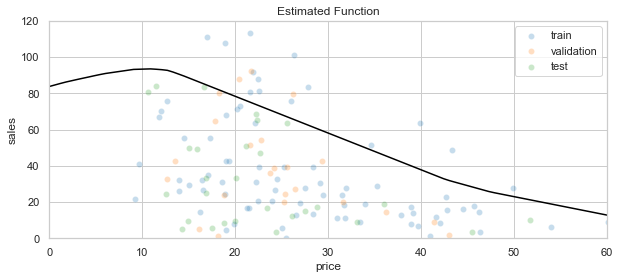

In [4]:
sbr_uni = UnivariateSBR(direction=-1, output_act=None, h_units=[32, 32], input_dim=1)
sbr_uni.compile(optimizer='rmsprop', loss='mse')

early_stopping = EarlyStopping(monitor='def_loss', patience=50, restore_best_weights=True)
sbr_uni.fit(x_train, y_train, epochs=1000, callbacks=[early_stopping], verbose=0)
sbr_uni.cars_summary(**data)

## SBR (With Augmentation)

In [5]:
x_aug, y_aug, _ = reg.get_augmented_data(x_train, y_train, directions=-1, n=15)
sbr_batches = SBRBatchGenerator(x_aug, y_aug['sales'], y_aug['ground_index'], y_aug['monotonicity'], 4)
sbr_batches.batches[0].head(16)

,price,label,monotonicity
0,0.390643,0.017077,0.0
1,0.576157,NaN,-1.0
2,0.592042,NaN,-1.0
3,0.572252,NaN,-1.0
4,0.223082,NaN,1.0
5,0.952749,NaN,-1.0
6,0.447125,NaN,-1.0
7,0.846409,NaN,-1.0
8,0.699479,NaN,-1.0
9,0.297437,NaN,1.0


-0.3236 (train r2), -0.6022 (validation r2), -0.2611 (test r2)


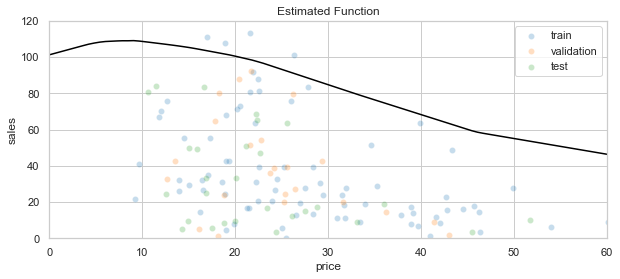

In [6]:
sbr_aug = SBR(output_act=None, h_units=[32, 32])
sbr_aug.compile(optimizer='rmsprop', loss='mse')

early_stopping = EarlyStopping(monitor='def_loss', patience=50, restore_best_weights=True)
sbr_aug.fit(sbr_batches, epochs=1000, callbacks=[early_stopping], verbose=0)
sbr_aug.cars_summary(**data)

# Puzzles Dataset

In [7]:
data = reg.load_puzzles('../res/puzzles.csv')
x_train, y_train = data['train']
x_val, y_val = data['validation']
x_train.join(y_train)

,word_count,star_rating,num_reviews,label
0,0.160909,0.800000,0.072727,0.046105
1,0.520699,0.969231,0.236364,0.085851
2,0.182246,0.964706,0.309091,0.297297
3,0.401818,0.933333,0.272727,0.287758
4,0.032727,1.000000,0.018182,0.071542
...,...,...,...,...
150,0.271091,1.000000,0.181818,0.117647
151,0.130909,0.977778,0.163636,0.076312
152,0.252587,1.000000,0.236364,0.049285
153,0.180000,0.920000,0.090909,0.038156
